In [26]:
## Importing Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
if os.environ.get("GITHUB_ACTIONS") or os.environ.get("CI"):
    # If running in CI/CD or GitHub rendering
    pio.renderers.default = "png"
else:
    # Local interactive view
    pio.renderers.default = "notebook"

In [27]:
##Importing Dataset
data = pd.read_csv("D:\Rohini Personal\Data Analysis\Projects Datasets\CLV using Python\customer_acquisition_data.csv")
print(data.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


### 1) Distrribution of acquisition cost and revenue generated by the customer using histograms

In [34]:
fig = px.histogram(data,
            x = "cost",
                  nbins = 20,
                  title = 'Distribution of Acquisition Cost')
fig.show()

In [29]:
fig = px.histogram(data,
                  x = "revenue",
                  nbins = 20,
                  title = 'Distribution by Revenue')
fig.update_layout(
    width=800,
    height=400 
)
fig.show()

### 2)Comparision of acquisition across different channels and identify the most and least profitable channels

In [30]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index().sort_values(by = 'cost', ascending = False)
fig = px.bar(cost_by_channel,
            x = 'channel',
            y = 'cost',
            title = 'Customer Acquisition Cost by Channel')
fig.update_layout(
    width=800,
    height=400 
)
fig.show()

### 3)Channels effectiveness at converting customers

In [31]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index().sort_values(by = 'conversion_rate', ascending = False)
fig = px.bar(conversion_by_channel, x = 'channel',
            y = 'conversion_rate',
            title = 'Conversion Rate by Channel')
fig.update_layout(
    width=800,
    height=400 
)
fig.show()

### 4)Total Revenue by Channel

In [32]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index().sort_values(by = 'revenue', ascending = False)
fig = px.bar(revenue_by_channel,
            x = 'channel',
            y = 'revenue',
            title = 'Total Revenue by Channel')
fig.update_layout(
    width=800,  # Set the width in pixels
    height=400  # Set the height in pixels
)
fig.show()

### 4)Return of Investment(ROI) by Channel

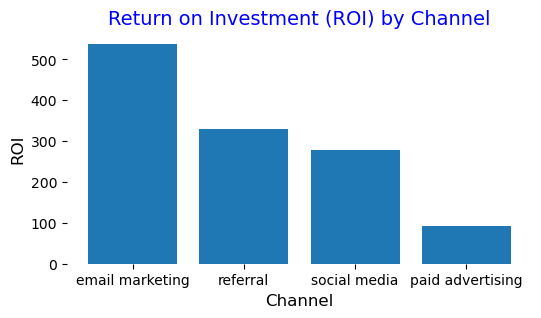

In [33]:
data['roi'] = data['revenue']/data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index().sort_values(by = 'roi', ascending = False)
plt.figure(figsize=(6, 3))
plt.bar(roi_by_channel['channel'], roi_by_channel['roi'])
plt.title('Return on Investment (ROI) by Channel', fontsize=14, color = 'blue')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.box(False)
plt.show()